# Transformation of features

In [1]:
# why transformation of features are required?
# 1.Linear regression--dradient decent---global minima
# 2.Algorithms like KNN, k-means, hierarchicahal clustering----euclidian distance


# Types of Transformation
1.Normalization & standardization
2.Scaling to minimum & maximum values
3.scaling to median & quantiles
4. Guassian Transformation
   -Logarithmic transformation
   -Reciprocal Transformation
   -Square root Transformation
   -Exponential Transformation
   -Box Cox Transformation

# Standardization
we try to bring all variables or features to a similar scale. standardization means centering the variable at zero
z=(x-x_mean)/std

In [2]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [6]:
####Standardization: we use the standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler


In [7]:
scaler=StandardScaler() #object creation
#fit vs fit_transform
df_scaled=scaler.fit_transform(df)

In [9]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

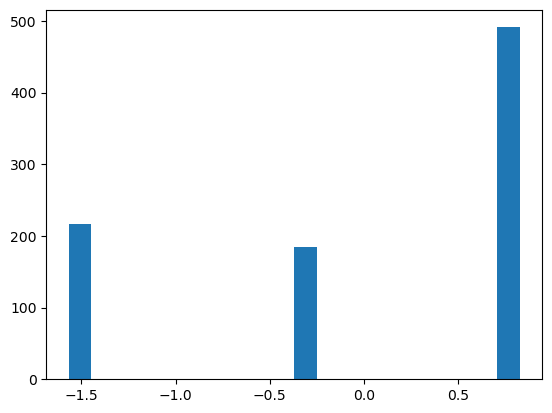

In [11]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

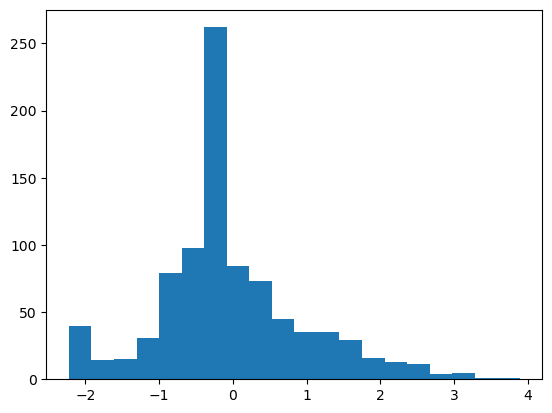

In [13]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

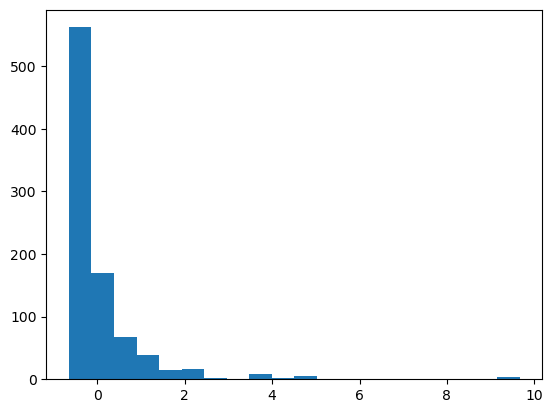

In [14]:
plt.hist(df_scaled[:,3],bins=20)

# Min Max scaling (used in CNN)
Min max scaling scales the value 0 to 1.
x_Scaled=(X-X.min/(X.max-X.min))

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

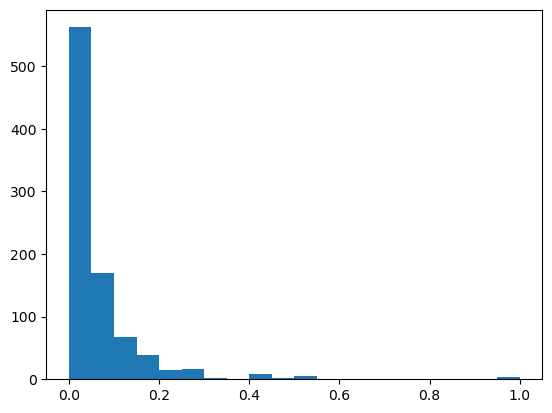

In [19]:
plt.hist(df_minmax['Fare'],bins=20)

# 3.Robust Scaler
It is used to scale the feature to median & quantiles
scaling using median and quantiles consists of subtracting the median to all the observations 
& then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:
    IQR=75th quantile 25th quantile 
X_scaled=(X-X.median)/IQR

# 0,1,2,3,4,5,6,7,8,9,10
9-90 percentile----90% of all values in this group is less than 9
1-10 percentile----10% of all values in this group is less than 1
IQR=7.5-2.5=50%
Robust to outliers

In [26]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

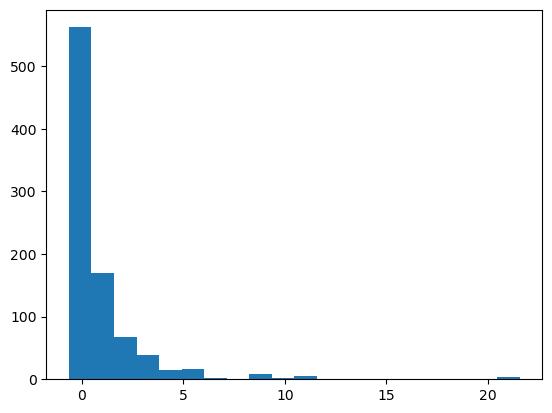

In [27]:
plt.hist(df_robust_scaler['Fare'],bins=20)

# 4.Guassian Transformation
Its same like Normal Distribution
some machine leeaning algorithms like linear or logistic assume that the features are normally distributed.
It gives good Accuracy & Performance
we convert any distribution to gussian or normal distribution
   -Logarithmic transformation
   -Reciprocal Transformation
   -Square root Transformation
   -Exponential Transformation
   -Box Cox Transformation


4.1 LOGARITHMIC Transformation

In [29]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [31]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [32]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [44]:
import scipy.stats as stat
import pylab

In [45]:
###If you want to check whether feature is guassian or normal distributed,
#Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

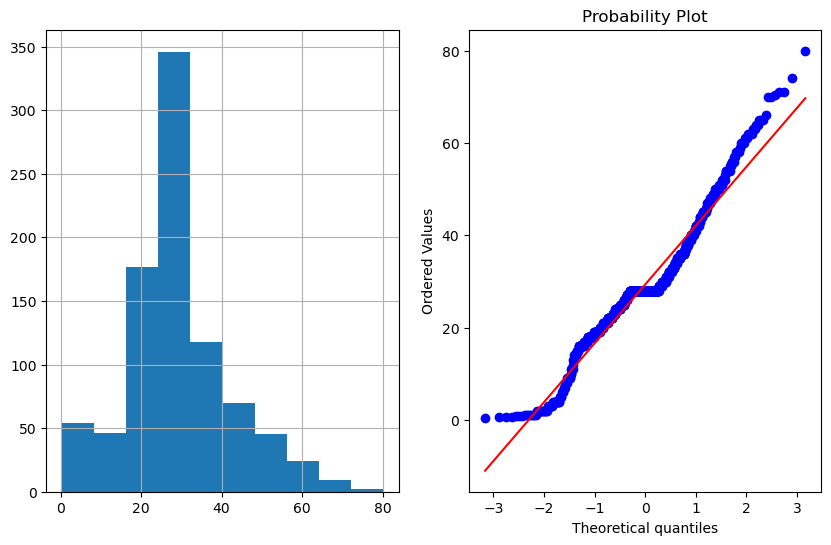

In [46]:
plot_data(df,'Age')

In [47]:
####Logarithmic Transformation

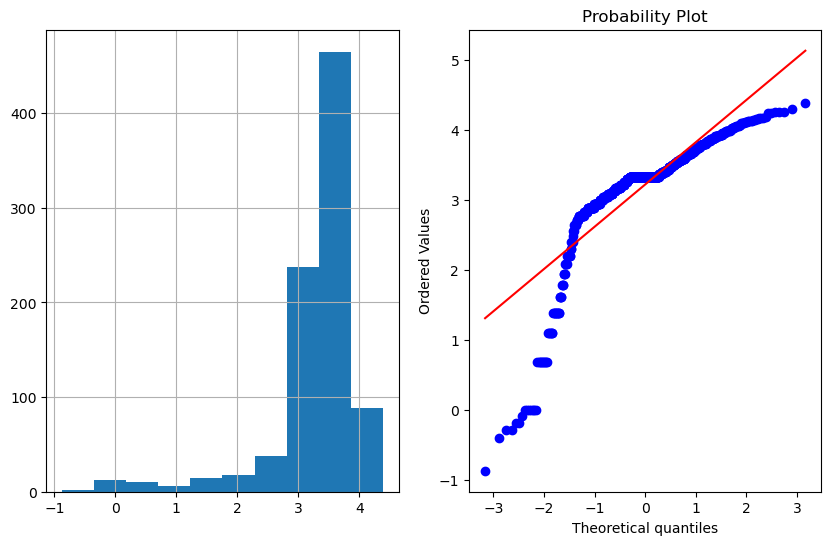

In [48]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

####Reciprocal Transformation


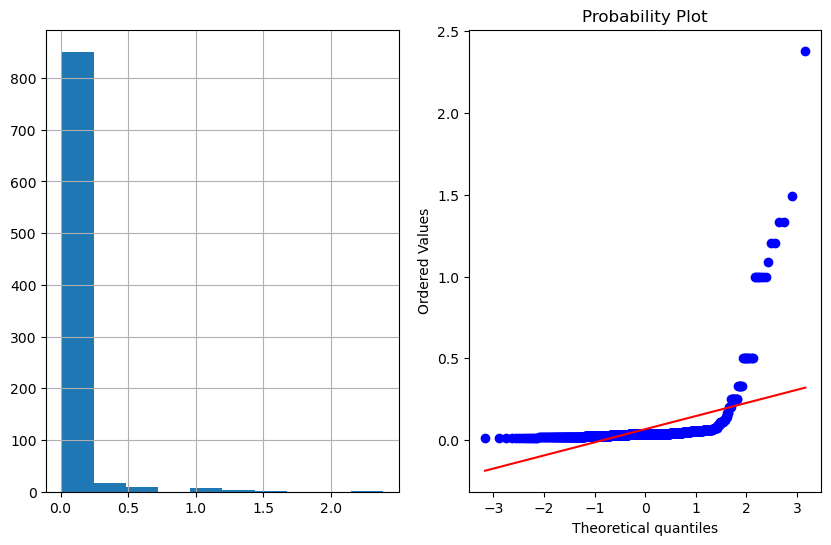

In [51]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

####Square root transformation

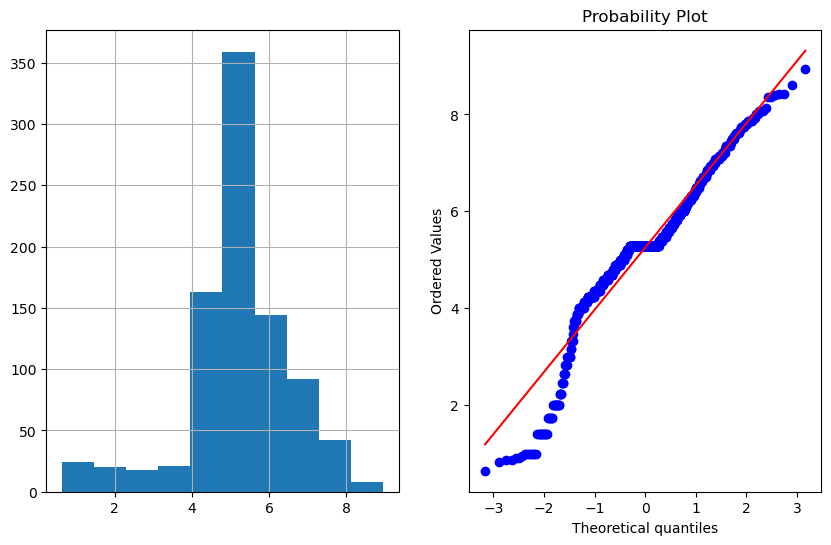

In [52]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

####Exponential transformation

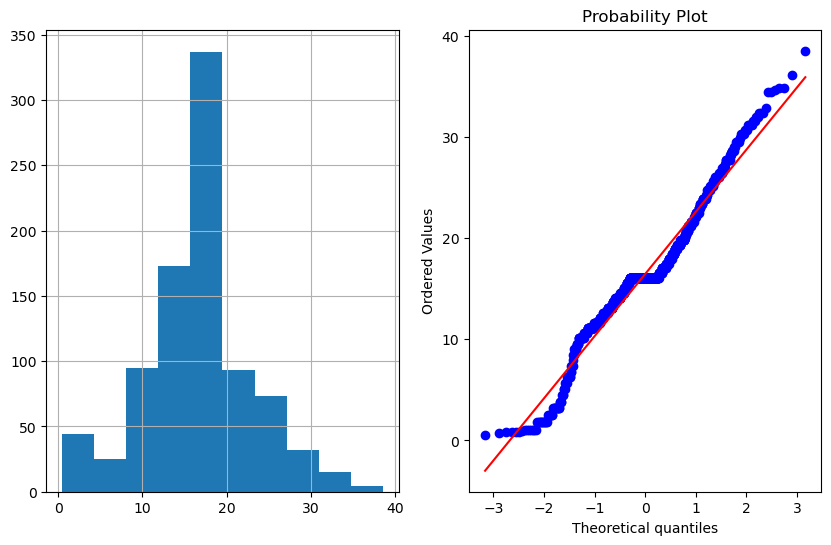

In [53]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

####Box Cox Transformation
T(Y)=(Y exp(lambda) -1)/lambda,   
-5<lambda<5

In [57]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])

In [58]:
print(parameters)

0.7964531473656952


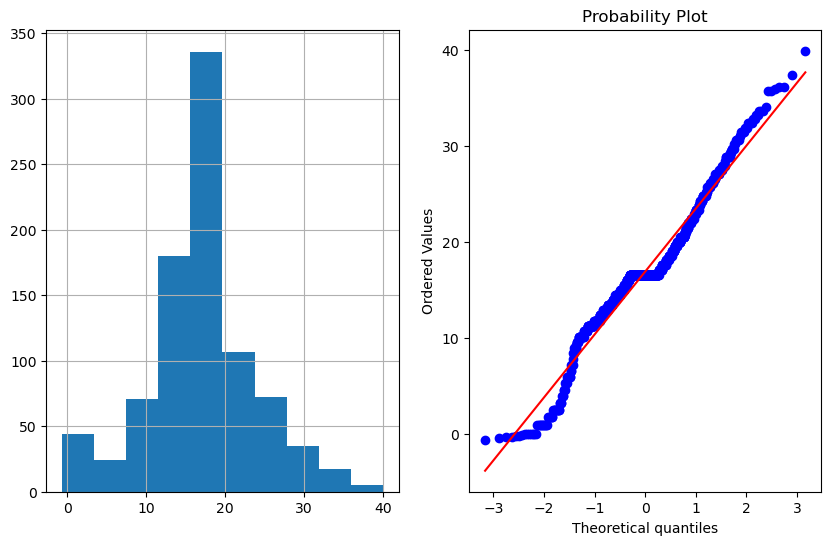

In [59]:
plot_data(df,'Age_boxcox')